In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

In [4]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score
)

In [5]:
data_credit = pd.read_csv('credit_train.csv')

In [6]:
data_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
data_credit = data_credit.drop(['Credit Score', 'Maximum Open Credit'], axis=1)

In [8]:
data_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,0.0,0.0


In [9]:
data_credit.shape

(100514, 17)

In [10]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Bankruptcies,99796.0,1.177402e-01,3.514238e-01,0.0,0.0000,0.0,0.000000e+00,7.000000e+00
Tax Liens,99990.0,2.931293e-02,2.581824e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01


In [11]:
data_credit.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [12]:
data_credit.tail(515)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,935180.0,NaN,Own Home,Debt Consolidation,9118.1,13.0,NaN,4.0,1.0,45600.0,1.0,0.0
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_credit = data_credit.iloc[:100000]

In [14]:
data_credit.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,1.0,0.0


In [15]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Bankruptcies,99796.0,1.177402e-01,3.514238e-01,0.0,0.0000,0.0,0.000000e+00,7.000000e+00
Tax Liens,99990.0,2.931293e-02,2.581824e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01


In [16]:
data_credit.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [17]:
data_credit.describe(include=["object"]).T

,count,unique,top,freq
Loan ID,100000,81999,14dd8831-6af5-400b-83ec-68e61888a048,2
Customer ID,100000,81999,981165ec-3274-42f5-a3b4-d104041a9ca9,2
Loan Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208
Years in current job,95778,11,10+ years,31121
Home Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552


In [18]:
data_credit = data_credit.rename(columns={'Loan ID':'Loan_ID',
                                         'Customer ID':'Customer_ID',
                                         'Loan Status':'Loan_Status',
                                         'Current Loan Amount':'Current_Loan_Amount',
                                         'Annual Income':'Annual_Income',
                                         'Years in current job':'Years_in_current_job',
                                         'Home Ownership':'Home_Ownership',
                                         'Monthly Debt':'Monthly_Debt',
                                         'Years of Credit History':'Years_of_Credit_History',
                                         'Months since last delinquent':'Months_since_last_delinquent',
                                         'Number of Open Accounts':'Number_of_Open_Accounts',
                                         'Number of Credit Problems':'Number_of_Credit_Problems',
                                         'Current Credit Balance':'Current_Credit_Balance',
                                         'Tax Liens':'Tax_Liens'})

In [19]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,0.0,0.0


In [20]:
data_credit = data_credit.fillna({'Annual_Income':data_credit.Annual_Income.median(),
                                  'Years_in_current_job':'10+ years',
                                 'Months_since_last_delinquent':data_credit.Months_since_last_delinquent.median(),
                                 'Bankruptcies':data_credit.Bankruptcies.median(),
                                 'Tax_Liens':data_credit.Tax_Liens.median()})

In [21]:
data_credit.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [22]:
data_credit.shape

(100000, 17)

In [23]:
sus = ['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History', 'Months_since_last_delinquent',
        'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Current_Credit_Balance', 'Bankruptcies', 'Tax_Liens']

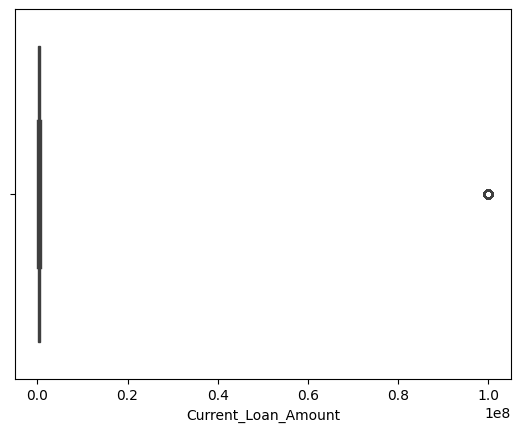

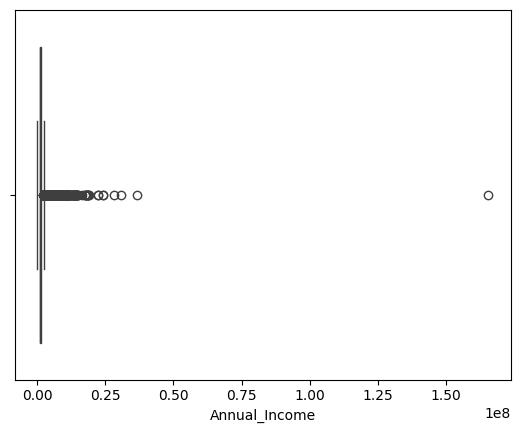

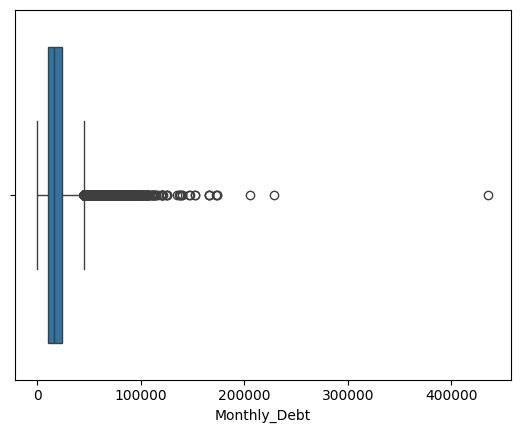

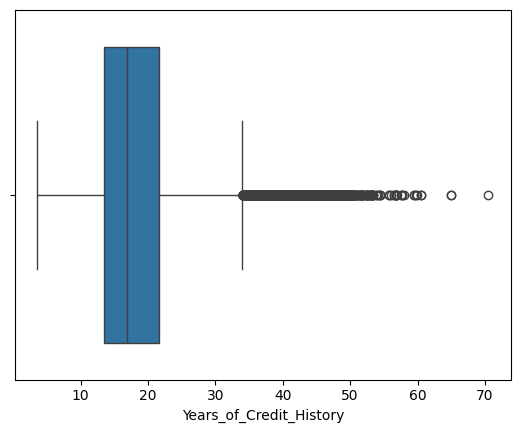

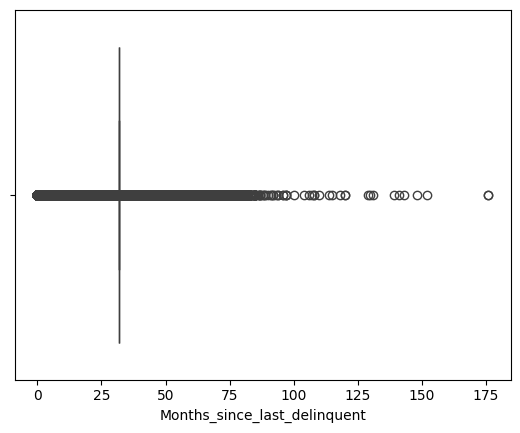

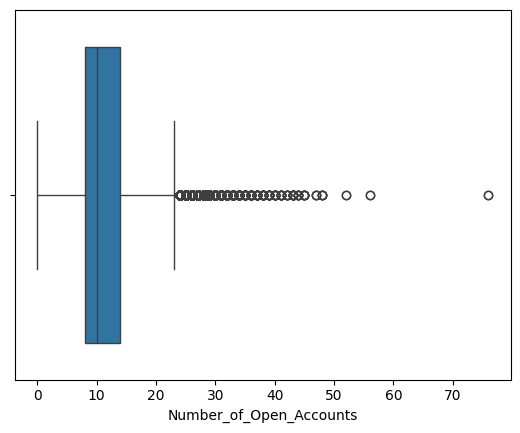

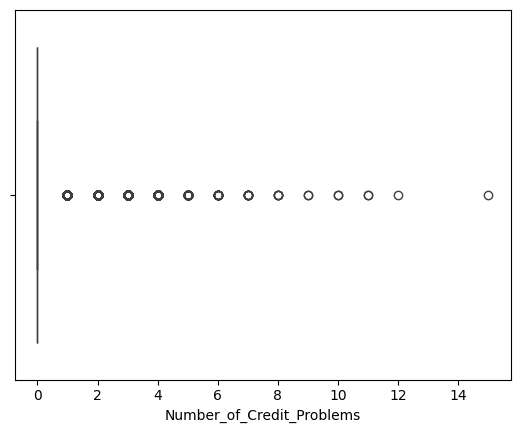

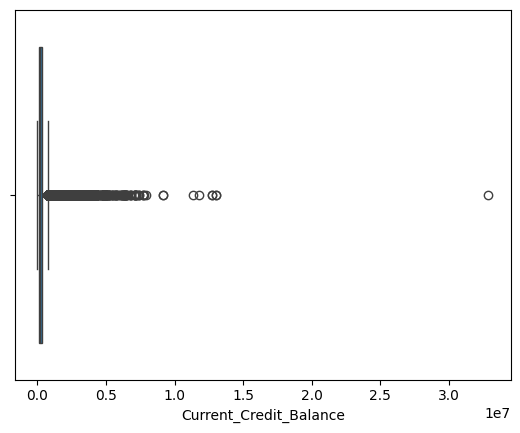

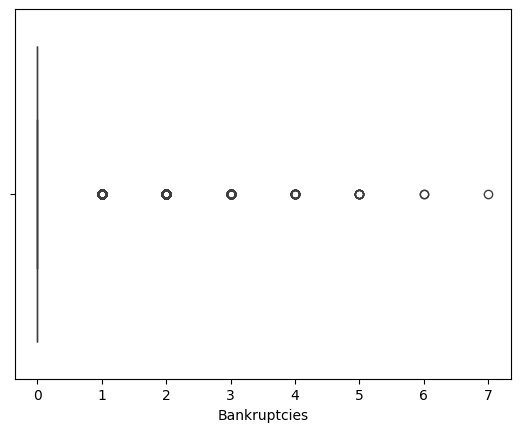

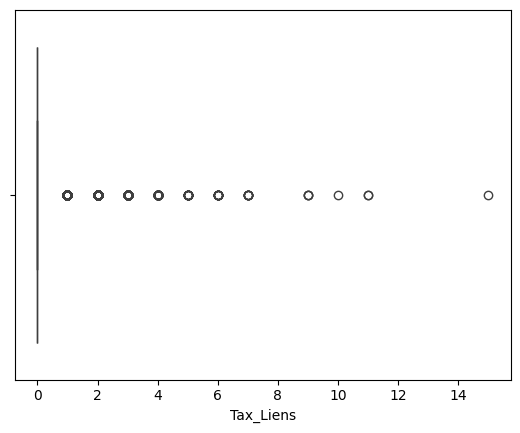

In [24]:
for i in sus:
    plt.figure()
    sns.boxplot(x=data_credit[i])

In [25]:
data_credit.query('Number_of_Open_Accounts==0')

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
19329,fa6217cb-0fce-4250-b151-24b0e87ceec5,2db8b14a-ab5d-40aa-98fc-ccdce71c4230,Charged Off,547316.0,Long Term,1174162.0,7 years,Own Home,Debt Consolidation,0.00,14.6,32.0,0.0,0.0,0.0,0.0,0.0
77563,533853f7-1e73-4234-8d2d-4080a335638d,3fbfa439-fc19-408c-9580-ffcbb50f4683,Charged Off,87054.0,Short Term,1174162.0,1 year,Rent,Debt Consolidation,1344.82,12.3,49.0,0.0,0.0,0.0,0.0,0.0


In [39]:
for i in list(data_credit.select_dtypes('object').columns):
    print(data_credit[i].unique())

['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f']
['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3'
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b3014be-5c07-4d41-abe7-44573c375886']
['Fully Paid' 'Charged Off']
['Short Term' 'Long Term']
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' '6 years']
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']
